<a href="https://colab.research.google.com/github/romitbarua/MultiModalDeepFake/blob/main/TestingNotebooks/MFCCExtractFunc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import sklearn
import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd
from librosa import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
filename = '/content/drive/MyDrive/FakeAVCeleb/FakeAVCeleb_v1.2/wav2lip_metadata.csv'
metadata_df = pd.read_csv(filename)

In [ ]:
filepaths = metadata_df.filepath.to_list()

In [ ]:
audio_file = filepaths[0].replace('mp4', 'wav')

In [ ]:
audio,sample_rate = librosa.load(audio_file)
mfcc_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=20)

In [ ]:
mfcc_features.shape

(20, 435)

In [ ]:
mfcc_features = mfcc_features.astype(np.double)

In [ ]:
#scale the MFCCs such that each coefficient dimension has zero mean and unit variance
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html
scaled_mfcc_features = sklearn.preprocessing.scale(mfcc_features, axis=1)

In [ ]:
def generate_scaled_mfcc_features(audio_file_path, plot=False):
  #generate audio time series
  audio,sample_rate = librosa.load(audio_file_path)
  #generate mfcc features
  mfcc_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=20)
  #convert to double to avoid numeric computation issues
  mfcc_features = mfcc_features.astype(np.double)
  #scale the MFCCs such that each coefficient dimension has zero mean and unit variance
  scaled_mfcc_features = sklearn.preprocessing.scale(mfcc_features, axis=1)

  if plot==True:
    fig, ax = plt.subplots(nrows=1, figsize=(15, 7), sharex=True, sharey=True)
    mfcc_plot = display.specshow(mfcc_features, sr=sample_rate, x_axis='time', ax=ax)
    ax.set(title='MFCC spectrogram for {}'.format(audio_file_path.split('/')[-2]))
    fig.colorbar(mfcc_plot, ax=ax)
    return scaled_mfcc_features, mfcc_plot
  
  return scaled_mfcc_features

(array([[ 0.46665774,  0.66424067,  0.73601981, ...,  1.1262867 ,
          1.24987346,  1.32232234],
        [-2.58604067, -2.69439848, -2.80997837, ...,  0.36650966,
          0.51510846,  0.82878663],
        [ 0.64784956,  0.54152059,  0.40525892, ..., -0.65328431,
         -1.40672892, -1.47991384],
        ...,
        [ 0.39948905, -0.55713051, -0.55201782, ..., -0.09048638,
         -0.52541208, -0.1474519 ],
        [ 1.18303084,  1.13468591,  1.20702292, ...,  0.41240325,
         -0.15030572,  0.65868766],
        [-0.59885095, -1.05967349, -0.57139227, ...,  0.57837515,
         -0.30024465,  0.54611095]]),
 <matplotlib.collections.QuadMesh at 0x7fbc0d4f2250>)

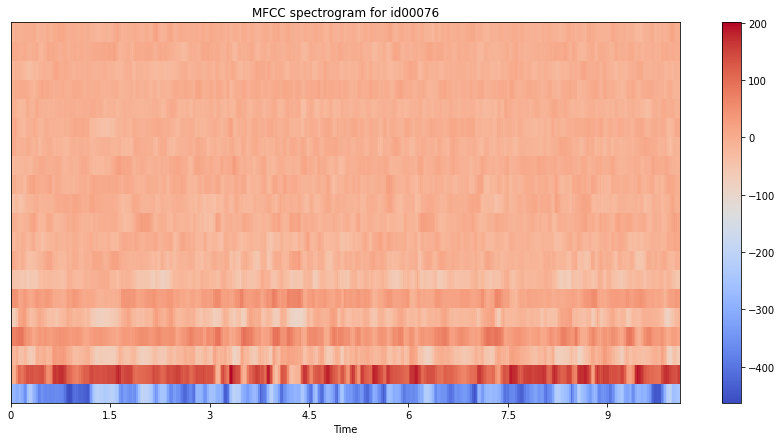

In [ ]:
generate_scaled_mfcc_features(audio_file, plot=True)